In [14]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [4]:
pika = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\S_S\Image Process\pikachu.png")
pok = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\S_S\Image Process\pokemon.png")
display(pika.shape)
display(pok.shape)

(590, 600, 3)

(136, 371, 3)

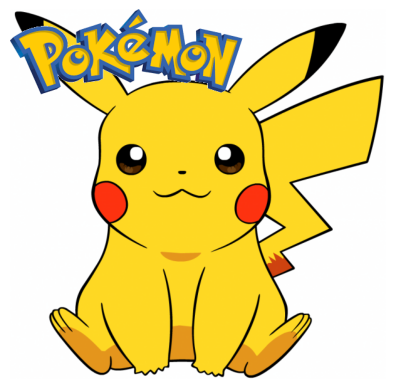

In [30]:
### 영상 출력
img_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [7]:
img_mask = np.zeros(pika.shape, dtype = 'uint8')

img_mask[:, :] = 255

In [9]:
### 영상 삽입 - 좌측 상단
# img_out 변수에 img_jeju 이미지 복사
img_out = img_mask.copy()

# img_logo의 높이, 너비, 채널 정보를 가져옴
h, w, c = pok.shape

# img_logo를 img_out의 좌측 상단에 삽입
img_out[:h, :w, :] = pok

In [16]:
img_logo_gray = cv2.cvtColor(img_out, cv2.COLOR_BGR2GRAY)
ret, img_binary_inv = cv2.threshold(img_logo_gray, 240, 255, cv2.THRESH_BINARY_INV)

In [18]:
### 논리연산 → 영상 추출
img_pok = cv2.bitwise_and(img_out, cv2.cvtColor(img_binary_inv, cv2.COLOR_GRAY2BGR))



In [21]:
ret, img_binary = cv2.threshold(img_logo_gray, 240, 255, cv2.THRESH_BINARY)
### 논리연산 → 영상 추출
img_1 = cv2.bitwise_and(pika, cv2.cvtColor(img_binary, cv2.COLOR_GRAY2BGR))

In [29]:
img_result = cv2.add(img_1, img_pok)